In [1]:
from PIL import Image, ImageDraw


In [2]:
cellWidth = 58
cellHeight = 32

cellVertSpacing = 50    
cellHorizSpacing = 64

barWidth = (cellHorizSpacing - cellWidth)
barHeight = (cellVertSpacing - cellHeight)


In [374]:

def getCellLocation(i):
    x = i // 4
    y = i % 4
    if x % 2 == 0:
        y = 3 - y
    x = 3 - x
    return x,y

def DrawWhiteCell(draw,i):
    x, y = getCellLocation(i)
    tl = (x * cellHorizSpacing + 2, y * cellVertSpacing + 8)
    br = (tl[0] + cellWidth, tl[1] + cellHeight)
    draw.rectangle([tl,br], 'white', 'black', 1 )
    
def DrawBlackCell(draw, i):
    x, y = getCellLocation(i)
    tl = (x * cellHorizSpacing + 2, y * cellVertSpacing + 8)
    br = (tl[0] + cellWidth, tl[1] + cellHeight)
    draw.rectangle([tl,br], 'black', 'white', 1 )

def DrawActiveCell(draw, i):
    x, y = getCellLocation(i)

    tl = (x * cellHorizSpacing + 2, y * cellVertSpacing + 8)
    br = (tl[0] + cellWidth, tl[1] + cellHeight)
    draw.rectangle([tl,br], 'black', 'white', 3 )

    if i != 15:
        going_up = ((x % 2) == 1)
        going_down = not going_up
        going_left = False

        if going_up and y == 0:
            going_up = False
        elif going_down and ( y == 3):
            going_down = False

        if going_up:
            centerX = (tl[0] + br[0])/2    
            bar_tl = (centerX - barWidth/2, tl[1] - barHeight )
            bar_br = (bar_tl[0] + barWidth, bar_tl[1] + barHeight)
        elif going_down:
            centerX = (tl[0] + br[0])/2    
            bar_tl = (centerX - barWidth/2, br[1] )
            bar_br = (bar_tl[0] + barWidth, bar_tl[1] + barHeight)
        else:
            center_y = (tl[1] + br[1])/2
            bar_br = (tl[0], center_y + barWidth/2)
            bar_tl = (bar_br[0] - barWidth, bar_br[1] - barWidth)
        draw.rectangle([bar_tl, bar_br], 'white')

def DrawStage(draw, i):
    if i != 0:
        DrawWhiteCell(draw,i-1)
    DrawActiveCell(draw, i)

canvas = Image.new("RGB", (256,198), "#4b4b4b")
draw = ImageDraw.Draw(canvas)

for x in range(0,16):
    DrawBlackCell(draw, x)
canvas.save("../src/DWIN-landscape/DWIN_SOURCE/35_AutoLevel/17_se.png")
for i in range(0,16):
    DrawStage(draw,i)
    canvas.save("../src/DWIN-landscape/DWIN_SOURCE/35_AutoLevel/{}_se.png".format( 16 - i))

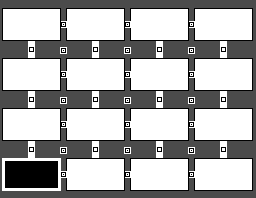

In [376]:
canvas = Image.new("RGB", (256,198), "#4b4b4b")
draw = ImageDraw.Draw(canvas)

def getCellLocation(i):
    x = i // 4
    y = i % 4
    x = 3 - x
    return x,y

def getDotLocation(i):
    x = i // 10
    y = i % 10
    x = 3 - x
    if y < 3:
        return (x * cellHorizSpacing + 2 + cellWidth//2 , y * cellVertSpacing + 8 + cellHeight + barHeight//2)
    elif y % 2 == 1:
        y = 4 - y//2
        return (x * cellHorizSpacing - 1, y * cellVertSpacing + 8 + cellHeight//2 )
    y = 5 - y//2
    return (x * cellHorizSpacing - 1, y * cellVertSpacing   )
    

def drawUncheckedBox(draw, i):
    x,y = getDotLocation(i)
    tl = (x - barWidth//2, y - barWidth//2)
    br = (tl[0] + barWidth, tl[1] + barWidth)
    draw.rectangle([tl, br], "Black", "White")

def drawActiveBox(draw, i):
    x,y = getDotLocation(i)
    tl = (x - barWidth//2, y - barWidth//2)
    br = (tl[0] + barWidth, tl[1] + barWidth)
    
    draw.rectangle([tl, br], "Black", "White")
    draw.rectangle([tl[0] + 2, tl[1]+2, br[0]-2, br[1]-2], "white")
    draw.rectangle( [x,y,x,y], "Black")

def drawDoneBox(draw, i):
    x,y = getDotLocation(i)
    tl = (x - barWidth//2, y - barWidth//2)
    br = (tl[0] + barWidth, tl[1] + barWidth)
    
    draw.rectangle([tl, br], "Black", "White")
    draw.rectangle([tl[0] + 2, tl[1]+2, br[0]-2, br[1]-2], "white")

def DrawActiveCell(draw, i):
    x, y = getCellLocation(i)

    tl = (x * cellHorizSpacing + 2, y * cellVertSpacing + 8)
    br = (tl[0] + cellWidth, tl[1] + cellHeight)
    draw.rectangle([tl,br], 'black', 'white', 3 )

    
    going_down = (y != 3)

    bar2_tl = None
    bar2_br = None
    centerX = (tl[0] + br[0])/2    
    centerY = (tl[1] + br[1])/2
    if going_down:
        
        bar_tl = (centerX - barWidth/2, br[1] )
        bar_br = (bar_tl[0] + barWidth, bar_tl[1] + (barHeight-barWidth)//2)
        if y != 0:
            bar2_tl = (centerX - barWidth/2, tl[1]- (barHeight-barWidth)//2)
            bar2_br = (bar_tl[0] + barWidth, tl[1] )
    else:
        bar_tl = (centerX - barWidth/2, tl[1]- (barHeight-barWidth)//2)
        bar_br = (bar_tl[0] + barWidth, tl[1] )
        
        
    if bar2_tl != None:
        draw.rectangle([bar2_tl, bar2_br], 'white')    
    draw.rectangle([bar_tl, bar_br], 'white')

def DrawProbedCell(draw, i):
    x, y = getCellLocation(i)

    tl = (x * cellHorizSpacing + 2, y * cellVertSpacing + 8)
    br = (tl[0] + cellWidth, tl[1] + cellHeight)

    if i != 15:
        going_down = (y != 3)
        centerX = (tl[0] + br[0])/2    
        centerY = (tl[1] + br[1])/2
        if going_down:
            
            bar_tl = (centerX - barWidth/2 + 2, br[1] )
            bar_br = (bar_tl[0] + barWidth - 4, bar_tl[1] + (barHeight-barWidth)//2 - 1)
        else:
            
            bar_br = (tl[0], centerY + barWidth/2)
            bar_tl = (bar_br[0] - barWidth, bar_br[1] - barWidth)    
        draw.rectangle([bar_tl, bar_br], 'black')
        
def DrawDoneCell(draw, i):
    x, y = getCellLocation(i)

    tl = (x * cellHorizSpacing + 2, y * cellVertSpacing + 8)
    br = (tl[0] + cellWidth, tl[1] + cellHeight)
    draw.rectangle([tl,br], 'white', 'black', 1 )

    if i != 15:
        going_down = (y != 3)

        centerX = (tl[0] + br[0])/2    
        centerY = (tl[1] + br[1])/2
        if going_down:
            
            bar_tl = (centerX - barWidth//2, br[1] +1 )
            bar_br = (bar_tl[0] + barWidth, bar_tl[1] + (barHeight-barWidth)//2)
        else:
            
            bar_br = (tl[0], centerY + barWidth/2)
            bar_tl = (bar_br[0] - barWidth, bar_br[1] - barWidth)
            
        draw.rectangle([bar_tl, bar_br], 'white')

for x in range(0,16):
    DrawBlackCell(draw, x)
for x in range(0,33):
    drawUncheckedBox(draw, x)
canvas.save("../src/DWIN-landscape/DWIN_SOURCE/35_AutoLevel/79_max.png")
def drawStage(stage):
    stages = 14
    subStage = stage % stages
    row = stage // stages
    if subStage < 7:
        if subStage % 2 == 0:
            DrawActiveCell(draw, subStage//2 + 4 * row)
            if subStage != 0:
                previousCell = subStage//2 + 4 * row - 1
                DrawDoneCell(draw, previousCell)
                drawDoneBox(draw, subStage//2 - 1 + 10 * row)
        else:
            DrawDoneCell(draw, subStage//2 + 4 * row)
            DrawProbedCell(draw, subStage//2 + 4 * row)
            
            drawActiveBox(draw, subStage//2 + 10 * row)
    else:
        if subStage == 7:
            DrawDoneCell(draw, 3 + 4 * row)
        
        if stage != 49:
            drawActiveBox(draw,subStage - 4 + 10 * row)

for s in range(0,49):
    drawStage(s)
    canvas.save("../src/DWIN-landscape/DWIN_SOURCE/35_AutoLevel/{}_max.png".format( 78 - s))

canvas